# 1.Intrducció
L'spam o correu no sol·licitat, és una de les amenaces més perilloses que volten en el futur de la societat de la informació.

Aquest correu no sol·licitat és una gran eina pel món publicitari degut al baix cost i gran abast que proporcionen els serveis de missatgeria online. No obstant el creixement de l'spam és una amenaça a la convivència i a l'eficàcia dels correus electrònics, és per això que les grans distribuïdores de correus electrònics ja han realitzat algoritmes que permeten classificar aquest tipus de correu i emmagatzemar-lo a la carpeta d'spam per tal de facilitar l'ús del correu als seus usuaris i millorar la seva experiència.

![image info](https://scontent-mad1-1.xx.fbcdn.net/v/t1.6435-9/66518471_1296381087186397_6551382846613749760_n.png?_nc_cat=104&ccb=1-5&_nc_sid=9267fe&_nc_ohc=UuU7no3n1CgAX-gyEFe&_nc_ht=scontent-mad1-1.xx&oh=d12b60033a57b7aa4d62a5a66d0a26ec&oe=61D7A24D)


En aquest notebook realitzarem un anàlisi del dataset [Email Spam Classification](https://www.kaggle.com/balaka18/email-spam-classification-dataset-csv) de la plataforma [Kaggle](https://www.kaggle.com/kaggle) i intentarem classificar de manera automàtica mitjançant machine learning els correus spam que es troben dins del dataset.



# 2. Dependències

In [177]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.exceptions import DataConversionWarning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,f1_score,mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve

Hem utilitzat les següents llibreries:
- **Pandas:** Ens ajuda a tractar les dades.
- **Wanings:** Ens permet eliminar els warnings.
- **Matplotlib:** Ens permet realitzar gràfiques.
- **Seaborn:** Ens permet realitzar gràfiques.
- **Sklearn:** Ens permet entrenar els diferents models.

In [178]:
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

Eliminem gràcies a la llibreria warnings tots els possibles warnings que puguin apareixer en el codi, de tal forma que ens quedi el notebook molt més net i més entenedor per al lector.

# 3. Data mining

### Data analysis
Realitzarem un estudi del nostre dataset, veurem el numero d'atributs que conté, el nùmero de mostres, el número de valors nuls i apart també veurem el tipus de variables dels nostres atributs i aixi podrem entendre una mica millor el nostre dataset i veure quines seran les variables predictores i quina la nostre variable objectiu.

In [179]:
df = pd.read_csv("..\data\emails.csv")
print("Nombre d'emails: ", df.shape[0])
print("Nombre d'atributs per cada email: ", df.shape[1])
print("Nombre de valors Nulls: ",df.isnull().sum().sum())

Nombre d'emails:  5172
Nombre d'atributs per cada email:  3002
Nombre de valors Nulls:  0


In [180]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [181]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [183]:
sums = df.iloc[:, 1:].sum(axis=0)
print("Numero de vegades que apareix cada paraula entre tots els emails: \n")
print(sums)

Numero de vegades que apareix cada paraula entre tots els emails: 

the                34345
to                 32005
ect                26604
and                15907
for                16161
of                 13587
a                 287136
you                12757
hou                10470
in                 54824
on                 56560
is                 27857
this                7182
enron               6906
i                 237177
be                 16702
that                4781
will                4401
have                4162
with                4860
your                4212
at                 35854
we                 10234
s                 216251
are                 7285
it                 23280
by                  3400
com                 9140
as                 24864
from                4210
                   ...  
decisions             21
produced              28
ended                366
greatest              21
degree                45
solmonson             32
imbalan

In [184]:
print("El valor que mes es repeteix es: ",sums.idxmax(),", i es repeteix ",sums.max()," vegades")
print("El valor que menys es repeteix es: ",sums.idxmin(),", i es repeteix ",sums.min()," vegades")

El valor que mes es repeteix es:  e , i es repeteix  438561  vegades
El valor que menys es repeteix es:  felipe , i es repeteix  21  vegades


In [185]:
df['Prediction'].value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

El fitxer csv conté **5172** files, on cada fila representa un correu electronic. 

Per a cada correu electrònic hi ha **3002** columnes, on la primera columna indica el nom del correu electrònic en format numèric per tal de protegir la privadesa de l'usuari, l'última columna té les etiquetes de predicció on 0 significa que no es spam i 1 significa que si és spam, la resta de **3000** columnes son el nombre de vegades que apareixen les paraules més comunes a tots els correus electrònics.

Com veiem tots els nostres atributs son valors numèrics, excepte el primer camp que es un string que com hem dit abans indica l'usuari de l'email.

També podem veure que el nostre dataset conté **0** valors nulls.

Una vegada visualitzat i analitzat el nostre dataset, podrem dir que la variable objectiu serà **"Prediction"** (l'ultim atribut de les mostres), i les variables predictores seran les columnes amb el nombre de vegades que apareix cada paraula (tots els atributs menys el primer "Email No." i l'ultim "Prediction").

També podem veure que la variable que més apareix en tots els emails es **"e"** que apareix un total de **438561** vegades, metre que la que menys apareix es **"felipe"** que apareix un total de **21** vegades.

Per acabar el nostre dataset té **3672** correus que no són spam i **1500** que si ho son, per tant podem veure hi ha una petita diferencia entre els correus que son spam i els que no ho son , pero no creiem que la diferencia sigui suficient per a dir que les dades no estan balancejades.


### Data preparation
Realitzarem les transformacions necesaries al nostre dataset per tal de poder utilitzarlo alhora de realitzar el nostre estudi.

Com que tenim una gran quantitat de variables predictores, ens es molt complicat eliminar variables segons les correlacions, apart no tendria cap sentit fer-ho ja que cada paraula es important alhora de predir si un email es spam o no.

Tampoc podem eliminar valors nuls ja que com hem vist en el data analysis el nostre dataset no en té cap.

Un dels canvis que realitzarem serà eliminar la primera columna ja que per a la realització del model no ens serà necessaria ja que el número de correu es una dada irrellevant, el que farem serà posarla com a index del dataframe.

Un altre canvi que realitzarem serà la normalització de les dades mitjançant el mètode MinMaxScaler de la llibreria preprocessing de sklearn.

In [186]:
df = df.drop(['Email No.'], axis=1)
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)

print("Mostrarem les 5 primeres dades del nostre dataset, per veure que efectivament hem normalitzat correctament les dades: ")
df.head()

Mostrarem les 5 primeres dades del nostre dataset, per veure que efectivament hem normalitzat correctament les dades: 


,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001054,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.038095,0.098485,0.067055,0.067416,0.127660,0.025974,0.053741,0.014286,0.161677,0.080717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008772,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004215,0.000000,0.000000,0.017937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.037879,0.061224,0.000000,0.106383,0.012987,0.026870,0.028571,0.059880,0.004484,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.033333,0.045455,0.046647,0.011236,0.106383,0.025974,0.030032,0.000000,0.053892,0.013453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008772,0.0,0.0


# 4. Model Learning

## Data separation
En aquesta fase, separarem les dades que nosaltres volem entrenar en el nostre algoritme, i les separarem de la variable target, per realitzar aquesta fase utilitzarem la funció train_test_split de la llibreria sklearn.

Les dades que entrenarem seràn les **3000** columnes que contenen el nombre de vegades que apareix la paraula en els correus, mentre que la nostre variable target serà la ultima variabled el nostre dataset anomenada **"Predictions"**.

In [187]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Classificació de models
Models que utiltizarem:
- **Regressió logística**
- **Random Forest**
- **Naive Bayes**
- **SVC**

### Regressió logística


In [188]:
model_LR = LogisticRegression(solver='liblinear')
model_LR.fit(X_train,y_train)

predict_LR = model_LR.predict(X_test)
print(classification_report(predict_LR,y_test))

print("Score: ",model_LR.score(X_test,y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      1134
         1.0       0.91      0.95      0.93       418

   micro avg       0.96      0.96      0.96      1552
   macro avg       0.95      0.96      0.95      1552
weighted avg       0.96      0.96      0.96      1552

Score:  0.9626288659793815


### Random Forest

In [189]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train,y_train)

predict_RF = model_RF.predict(X_test)
print(classification_report(predict_RF,y_test))

print("Score: ",model_RF.score(X_test,y_test))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      1139
         1.0       0.88      0.93      0.90       413

   micro avg       0.95      0.95      0.95      1552
   macro avg       0.93      0.94      0.93      1552
weighted avg       0.95      0.95      0.95      1552

Score:  0.9478092783505154


### Naive Bayes

In [190]:
model_NB=MultinomialNB()
model_NB.fit(X_train,y_train)

predict_NB = model_NB.predict(X_test)
print(classification_report(predict_NB,y_test))

print("Score: ",model_NB.score(X_test,y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      1129
         1.0       0.85      0.88      0.87       423

   micro avg       0.93      0.93      0.93      1552
   macro avg       0.90      0.91      0.91      1552
weighted avg       0.93      0.93      0.93      1552

Score:  0.9259020618556701


### SVC

In [191]:
model_SVC= SVC(C=1.0,kernel='rbf',gamma='auto')
model_SVC.fit(X_train,y_train)

predict_SVC = model_SVC.predict(X_test)
print(classification_report(predict_SVC,y_test))

print("Score: ",model_SVC.score(X_test,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.72      0.84      1548
         1.0       0.01      1.00      0.02         4

   micro avg       0.72      0.72      0.72      1552
   macro avg       0.50      0.86      0.43      1552
weighted avg       1.00      0.72      0.83      1552

Score:  0.720360824742268


# 5. Resultats

En aquest apartat mostrarem els seguents atributs dels models entrenats previament:
- **Accuracy** del model.
- **F1 score** del model.
- **RMSE** del model.

Realitzarem una grafica per a comparar els resultats.

In [192]:
print("--------------------------------")

print("Regressió Logistica: ")
print ("Accuracy: ", accuracy_score(y_test, predict_LR)*100, "%")
print ("F1 SCORE: ", f1_score(y_test, predict_LR)*100, "%")
print ("RMSE: ", mean_squared_error(y_test, predict_LR))
print("--------------------------------\n")

print("--------------------------------")
print("Random Forest: ")
print ("Accuracy: ", accuracy_score(y_test, predict_RF)*100, "%")
print ("F1 SCORE: ", f1_score(y_test, predict_RF)*100, "%")
print ("RMSE: ", mean_squared_error(y_test, predict_RF))
print("--------------------------------\n")

print("--------------------------------")
print("Naive Bayes: ")
print ("Accuracy: ", accuracy_score(y_test, predict_NB)*100, "%")
print ("F1 SCORE: ", f1_score(y_test, predict_NB)*100, "%")
print ("RMSE: ", mean_squared_error(y_test, predict_NB))
print("--------------------------------\n")

print("--------------------------------")
print("SVC: ")
print ("Accuracy: ", accuracy_score(y_test, predict_SVC)*100, "%")
print ("F1 SCORE: ", f1_score(y_test, predict_SVC)*100, "%")
print ("RMSE: ", mean_squared_error(y_test, predict_SVC))
print("--------------------------------\n")

--------------------------------
Regressió Logistica: 
Accuracy:  96.26288659793815 %
F1 SCORE:  93.22429906542057 %
RMSE:  0.037371134020618556
--------------------------------

--------------------------------
Random Forest: 
Accuracy:  94.78092783505154 %
F1 SCORE:  90.48178613396004 %
RMSE:  0.05219072164948454
--------------------------------

--------------------------------
Naive Bayes: 
Accuracy:  92.59020618556701 %
F1 SCORE:  86.64343786295005 %
RMSE:  0.0740979381443299
--------------------------------

--------------------------------
SVC: 
Accuracy:  72.0360824742268 %
F1 SCORE:  1.809954751131222 %
RMSE:  0.27963917525773196
--------------------------------



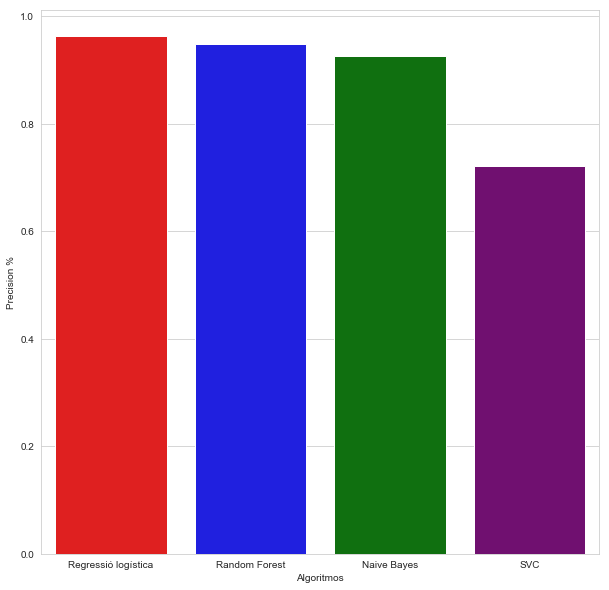

In [193]:
colors = ["red","blue","green","purple"]
lr_acc = accuracy_score(y_test, predict_LR)
rf_acc = accuracy_score(y_test, predict_RF)
nb_acc = accuracy_score(y_test, predict_NB)
svc_acc = accuracy_score(y_test, predict_SVC)
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
plt.ylabel("Precision %")
plt.xlabel("Algoritmos")
sns.barplot(x=['Regressió logística', 'Random Forest' ,'Naive Bayes','SVC'],y=[lr_acc,rf_acc,nb_acc,svc_acc], palette=colors )
plt.show()

# 6. Conclusions